In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import ast  # For safely evaluating the string as a list
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [112]:
df_nmf = pd.read_csv("nmf_results.csv")
grouped_nmf = df_nmf.groupby('n_components')
print(grouped_nmf.tail(5))

     n_components  reconstruction_error  alpha  l1_ratio  \
15              2            137.120641     10      0.00   
16              2            137.120641     10      0.25   
17              2            137.120641     10      0.50   
18              2            137.120641     10      0.75   
19              2            137.120641     10      1.00   
..            ...                   ...    ...       ...   
375            20            137.120641     10      0.00   
376            20            137.120641     10      0.25   
377            20            137.120641     10      0.50   
378            20            137.120641     10      0.75   
379            20            137.120641     10      1.00   

                                                topics        time  
15   ['windows', 'thanks', 'drive', 'card', 'know',...    0.480631  
16   ['ÿhooked', 'countryside', 'countryclub', 'cou...    0.482306  
17   ['ÿhooked', 'countryside', 'countryclub', 'cou...    0.645552  
18 

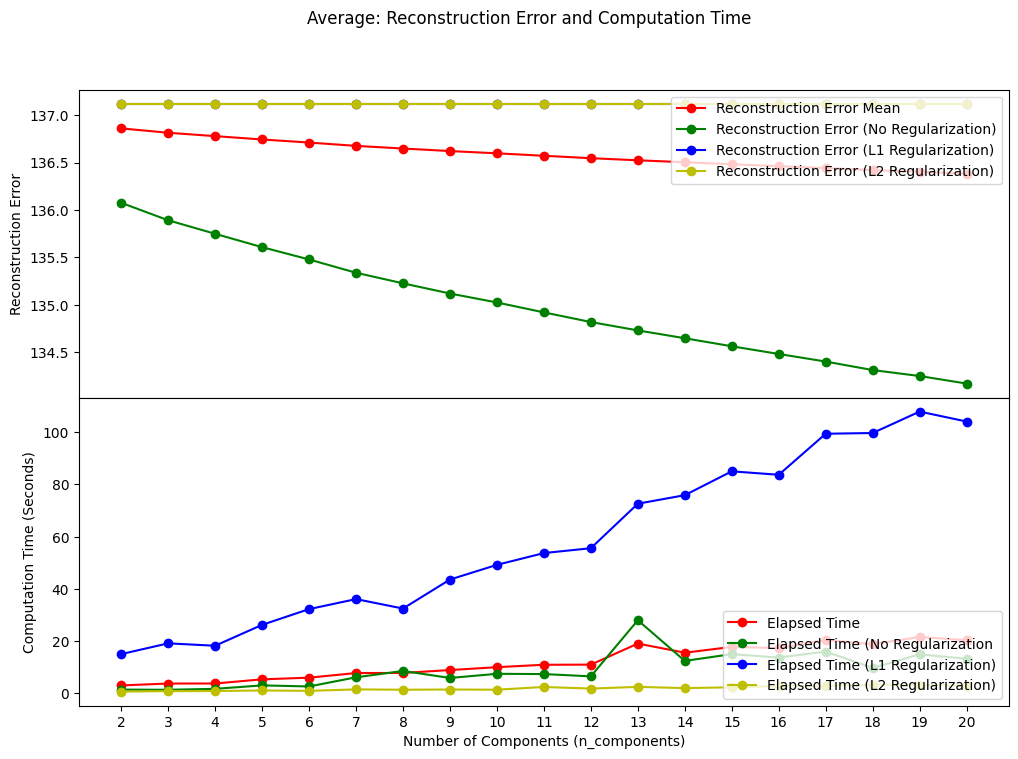

In [125]:
# Taking the mean for all technics
grouped = df_nmf.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_time = df_nmf.groupby('n_components')['time'].mean().reset_index()

# Taking only no regularization alpha == 0
none_filtered_df = df_nmf[df_nmf['alpha'] == 0]
grouped_none = none_filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_none_time = none_filtered_df.groupby('n_components')['time'].mean().reset_index()

# Taking only l1 regularization (alpha > 0 and l1_ratio > 0)
l1_filtered_df = df_nmf[(df_nmf['alpha'] > 0) & (df_nmf['l1_ratio'] == 1)]
grouped_l1 = l1_filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_l1_time = l1_filtered_df.groupby('n_components')['time'].mean().reset_index()

# Taking only l2 regularization (alpha > 0 and l1_ratio = 0)
l2_filtered_df = df_nmf[(df_nmf['alpha'] > 0) & (df_nmf['l1_ratio'] == 0)]
grouped_l2 = l2_filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_l2_time = l2_filtered_df.groupby('n_components')['time'].mean().reset_index()

fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(nrows = 2, hspace=0)
axes = gs.subplots(sharex=True)
axes[0].set_xticks(np.arange(min(grouped['n_components']), max(grouped['n_components']) + 1 , 1))
fig.suptitle('Average: Reconstruction Error and Computation Time') 
line1, = axes[0].plot(grouped['n_components'], grouped['reconstruction_error'], marker='o', linestyle='-', color='r', label='Reconstruction Error Mean')
line2, = axes[0].plot(grouped_none['n_components'], grouped_none['reconstruction_error'], marker='o', linestyle='-', color='g', label='Reconstruction Error (No Regularization)')
line3, = axes[0].plot(grouped_l1['n_components'], grouped_l1['reconstruction_error'], marker='o', linestyle='-', color='b', label='Reconstruction Error (L1 Regularization)')
line4, = axes[0].plot(grouped_l2['n_components'], grouped_l2['reconstruction_error'], marker='o', linestyle='-', color='y', label='Reconstruction Error (L2 Regularization)')
axes[0].set(xlabel = 'Number of Components (n_components)', ylabel='Reconstruction Error')
axes[0].legend(handles=[line1, line2, line3, line4], loc='upper right')

line5, = axes[1].plot(grouped_time['n_components'], grouped_time['time'], marker='o', linestyle='-', color='r', label='Elapsed Time')
line6, = axes[1].plot(grouped_none_time['n_components'], grouped_none_time['time'], marker='o', linestyle='-', color='g', label='Elapsed Time (No Regularization')
line7, = axes[1].plot(grouped_l1_time['n_components'], grouped_l1_time['time'], marker='o', linestyle='-', color='b', label='Elapsed Time (L1 Regularization)')
line8, = axes[1].plot(grouped_l2_time['n_components'], grouped_l2_time['time'], marker='o', linestyle='-', color='y', label='Elapsed Time (L2 Regularization)')
axes[1].set(xlabel = 'Number of Components (n_components)', ylabel='Computation Time (Seconds)')
# plt.legend()
axes[1].legend(handles=[line5, line6, line7, line8], loc='lower right')
plt.savefig("nmf_RE_CT_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

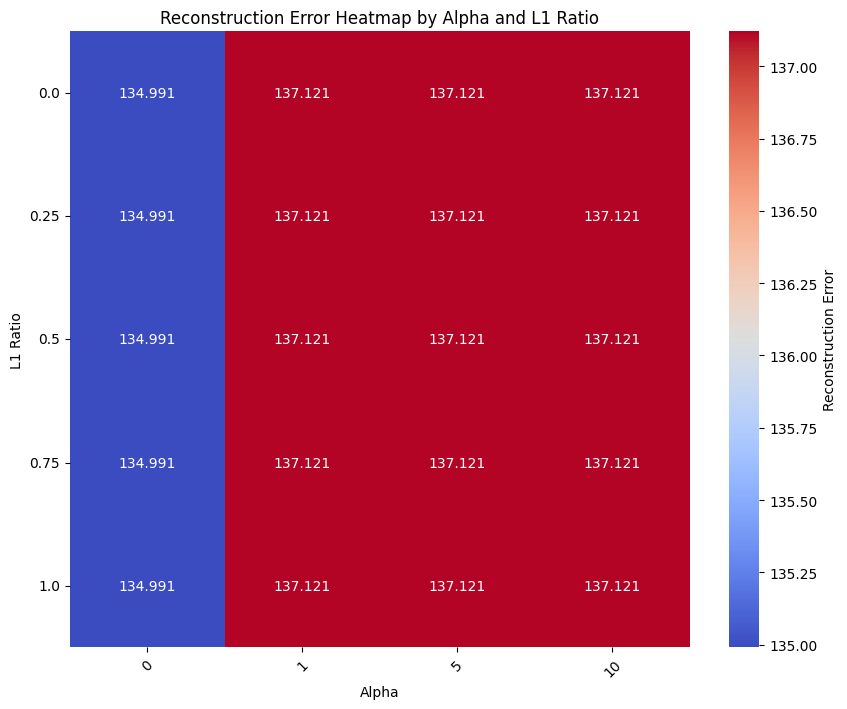

In [114]:
# pivot data to prepare for heatmap
# Grid form that columns=alpha, rows=l1_ratio cells=mean of reconstruction_error
heatmap_data = df_nmf.pivot_table(index='l1_ratio', columns='alpha', values='reconstruction_error', aggfunc='mean')

plt.figure(figsize=(10, 8))
# annot -> display reconstruction_error in cell cmap -> colour scheme
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'Reconstruction Error'})
plt.title('Reconstruction Error Heatmap by Alpha and L1 Ratio')
plt.xlabel('Alpha')
plt.ylabel('L1 Ratio')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("nmf_RE_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [115]:
df_svd = pd.read_csv("svd_results.csv")
grouped_svd = df_svd.groupby('n_components')
print(grouped_svd.tail(5))

    n_components  reconstruction_error  alpha  l1_ratio  \
0              2            252.230121      0         0   
1              2            252.230010      1         0   
2              2            136.764671      1         1   
3              3            255.929278      0         0   
4              3            255.929275      1         0   
5              3            136.751668      1         1   
6              4            258.592432      0         0   
7              4            258.592570      1         0   
8              4            136.719419      1         1   
9              5            260.766440      0         0   
10             5            260.766501      1         0   
11             5            136.654982      1         1   
12             6            262.611596      0         0   
13             6            262.611584      1         0   
14             6            136.634839      1         1   
15             7            264.103039      0         0 

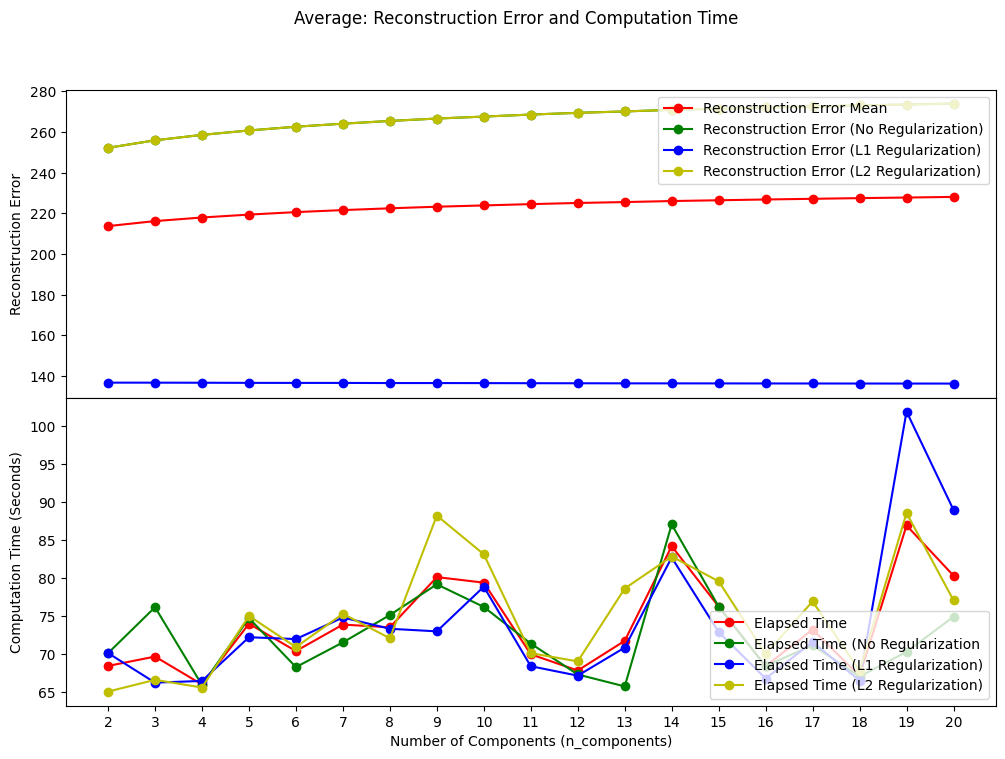

In [124]:
# Taking the mean for all technics
grouped = df_svd.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_time = df_svd.groupby('n_components')['time'].mean().reset_index()

# Taking only no regularization alpha == 0
none_filtered_df = df_svd[df_svd['alpha'] == 0]
grouped_none = none_filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_none_time = none_filtered_df.groupby('n_components')['time'].mean().reset_index()

# Taking only l1 regularization (alpha > 0 and l1_ratio > 0)
l1_filtered_df = df_svd[(df_svd['alpha'] == 1) & (df_svd['l1_ratio'] == 1)]
grouped_l1 = l1_filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_l1_time = l1_filtered_df.groupby('n_components')['time'].mean().reset_index()

# Taking only l2 regularization (alpha > 0 and l1_ratio = 0)
l2_filtered_df = df_svd[(df_svd['alpha'] == 1) & (df_svd['l1_ratio'] == 0)]
grouped_l2 = l2_filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_l2_time = l2_filtered_df.groupby('n_components')['time'].mean().reset_index()

fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(nrows = 2, hspace=0)
axes = gs.subplots(sharex=True)
axes[0].set_xticks(np.arange(min(grouped['n_components']), max(grouped['n_components']) + 1 , 1))
fig.suptitle('Average: Reconstruction Error and Computation Time') 
line1, = axes[0].plot(grouped['n_components'], grouped['reconstruction_error'], marker='o', linestyle='-', color='r', label='Reconstruction Error Mean')
line2, = axes[0].plot(grouped_none['n_components'], grouped_none['reconstruction_error'], marker='o', linestyle='-', color='g', label='Reconstruction Error (No Regularization)')
line3, = axes[0].plot(grouped_l1['n_components'], grouped_l1['reconstruction_error'], marker='o', linestyle='-', color='b', label='Reconstruction Error (L1 Regularization)')
line4, = axes[0].plot(grouped_l2['n_components'], grouped_l2['reconstruction_error'], marker='o', linestyle='-', color='y', label='Reconstruction Error (L2 Regularization)')
axes[0].set(xlabel = 'Number of Components (n_components)', ylabel='Reconstruction Error')
axes[0].legend(handles=[line1, line2, line3, line4], loc='upper right')

line5, = axes[1].plot(grouped_time['n_components'], grouped_time['time'], marker='o', linestyle='-', color='r', label='Elapsed Time')
line6, = axes[1].plot(grouped_none_time['n_components'], grouped_none_time['time'], marker='o', linestyle='-', color='g', label='Elapsed Time (No Regularization')
line7, = axes[1].plot(grouped_l1_time['n_components'], grouped_l1_time['time'], marker='o', linestyle='-', color='b', label='Elapsed Time (L1 Regularization)')
line8, = axes[1].plot(grouped_l2_time['n_components'], grouped_l2_time['time'], marker='o', linestyle='-', color='y', label='Elapsed Time (L2 Regularization)')
axes[1].set(xlabel = 'Number of Components (n_components)', ylabel='Computation Time (Seconds)')
# plt.legend()
axes[1].legend(handles=[line5, line6, line7, line8], loc='lower right')
plt.savefig("svd_RE_CT_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

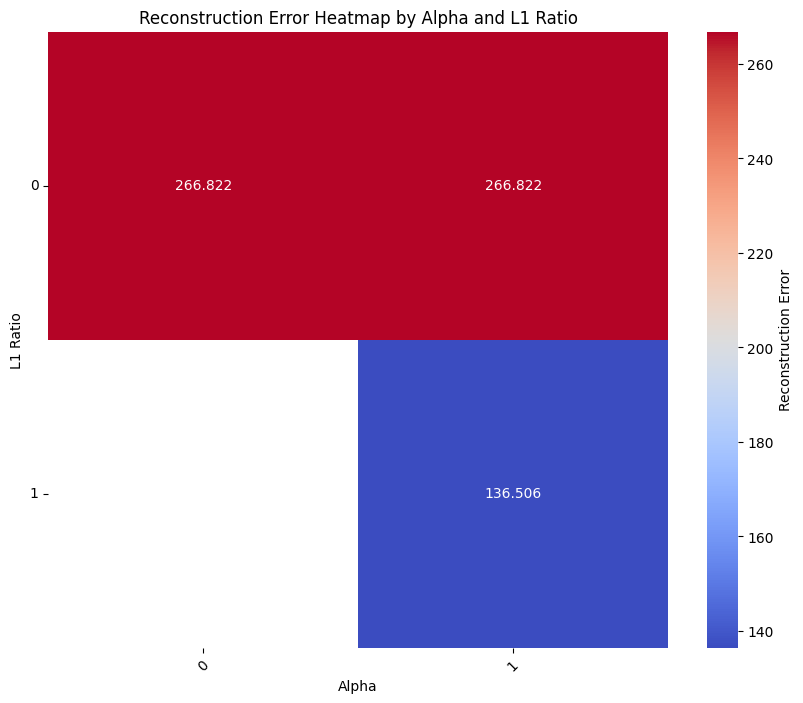

In [117]:
# pivot data to prepare for heatmap
# Grid form that columns=alpha, rows=l1_ratio cells=mean of reconstruction_error
heatmap_data = df_svd.pivot_table(index='l1_ratio', columns='alpha', values='reconstruction_error', aggfunc='mean')

plt.figure(figsize=(10, 8))
# annot -> display reconstruction_error in cell cmap -> colour scheme
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'Reconstruction Error'})
plt.title('Reconstruction Error Heatmap by Alpha and L1 Ratio')
plt.xlabel('Alpha')
plt.ylabel('L1 Ratio')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("svd_RE_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

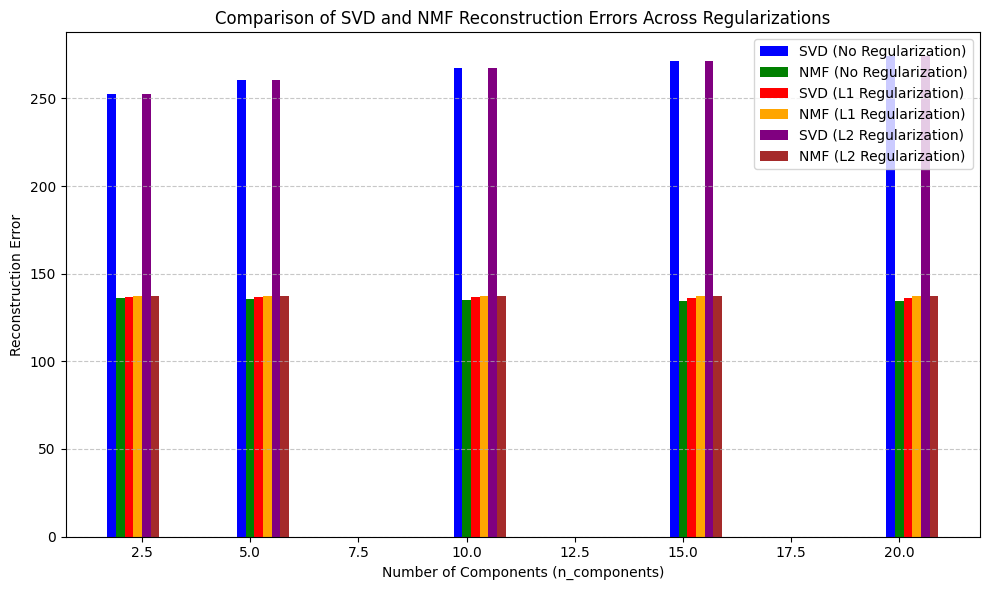

In [118]:
# Grouping data for SVD
grouped_svd_none = df_svd[df_svd['alpha'] == 0].groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_svd_l1 = df_svd[(df_svd['alpha'] == 1) & (df_svd['l1_ratio'] == 1)].groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_svd_l2 = df_svd[(df_svd['alpha'] == 1) & (df_svd['l1_ratio'] == 0)].groupby('n_components')['reconstruction_error'].mean().reset_index()

# Grouping data for NMF
grouped_nmf_none = df_nmf[df_nmf['alpha'] == 0].groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_nmf_l1 = df_nmf[(df_nmf['alpha'] > 0) & (df_nmf['l1_ratio'] == 1)].groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_nmf_l2 = df_nmf[(df_nmf['alpha'] > 0) & (df_nmf['l1_ratio'] == 0)].groupby('n_components')['reconstruction_error'].mean().reset_index()

# Merge the data on `n_components`
merged_data = pd.merge(grouped_svd_none, grouped_nmf_none, on='n_components', suffixes=('_svd_none', '_nmf_none'))
merged_data = pd.merge(merged_data, grouped_svd_l1, on='n_components', suffixes=('', '_svd_l1'))
merged_data = pd.merge(merged_data, grouped_nmf_l1, on='n_components', suffixes=('_svd_l1', '_nmf_l1'))
merged_data = pd.merge(merged_data, grouped_svd_l2, on='n_components', suffixes=('_nmf_l1', '_svd_l2'))
merged_data = pd.merge(merged_data, grouped_nmf_l2, on='n_components', suffixes=('_svd_l2', '_nmf_l2'))

# Filter the DataFrame for specific n_components values 
selected_components = [2, 5, 10, 15, 20]
filtered_data = merged_data[merged_data['n_components'].isin(selected_components)]
x = filtered_data['n_components']
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, filtered_data['reconstruction_error_svd_none'], width, label='SVD (No Regularization)', color='blue')
ax.bar(x, filtered_data['reconstruction_error_nmf_none'], width, label='NMF (No Regularization)', color='green')
ax.bar(x + width, filtered_data['reconstruction_error_svd_l1'], width, label='SVD (L1 Regularization)', color='red')
ax.bar(x + 2*width, filtered_data['reconstruction_error_nmf_l1'], width, label='NMF (L1 Regularization)', color='orange')
ax.bar(x + 3*width, filtered_data['reconstruction_error_svd_l2'], width, label='SVD (L2 Regularization)', color='purple')
ax.bar(x + 4*width, filtered_data['reconstruction_error_nmf_l2'], width, label='NMF (L2 Regularization)', color='brown')

# Customizing the plot
ax.set_xlabel('Number of Components (n_components)')
ax.set_ylabel('Reconstruction Error')
ax.set_title('Comparison of SVD and NMF Reconstruction Errors Across Regularizations')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.savefig("svd_nmf_RE_comparison.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

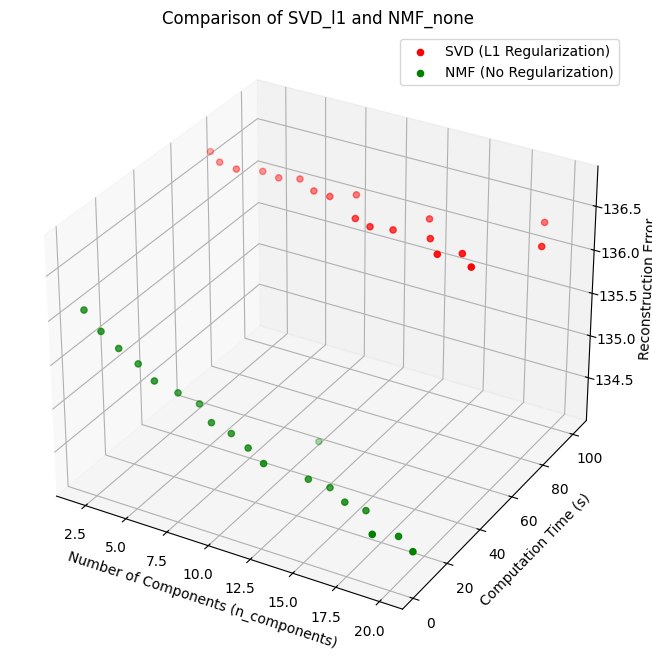

In [119]:
# Grouping data for SVD_l1 svd best choice
grouped_svd_l1 = df_svd[(df_svd['alpha'] == 1) & (df_svd['l1_ratio'] == 1)].groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_svd_l1_time = df_svd[(df_svd['alpha'] == 1) & (df_svd['l1_ratio'] == 1)].groupby('n_components')['time'].mean().reset_index()

# Grouping data for NMF_none nmf best choice
grouped_nmf_none = df_nmf[df_nmf['alpha'] == 0].groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_nmf_none_time = df_nmf[df_nmf['alpha'] == 0].groupby('n_components')['time'].mean().reset_index()

x_svd = grouped_svd_l1['n_components']
x_nmf = grouped_nmf_none['n_components']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for SVD_l1
ax.scatter(x_svd, grouped_svd_l1_time['time'], grouped_svd_l1['reconstruction_error'], c='red', label='SVD (L1 Regularization)')

# Scatter plot for NMF_none
ax.scatter(x_nmf, grouped_nmf_none_time['time'], grouped_nmf_none['reconstruction_error'], c='green', label='NMF (No Regularization)')


# Customize plot
ax.set_xlabel('Number of Components (n_components)')
ax.set_ylabel('Computation Time (s)')
ax.set_zlabel('Reconstruction Error')
ax.set_title('Comparison of SVD_l1 and NMF_none')
ax.legend()
plt.savefig("svd_nmf_comparison.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

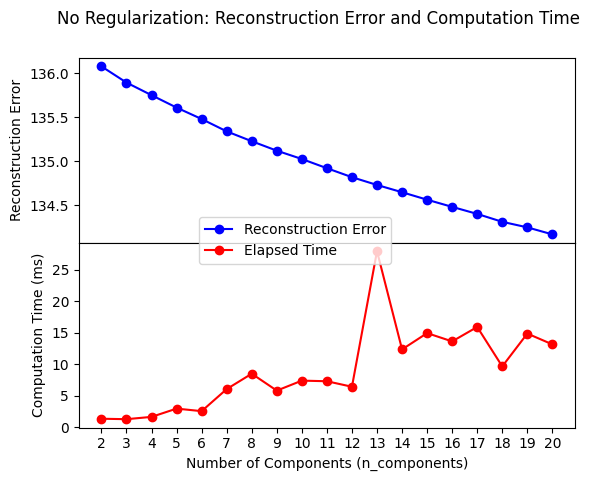

In [120]:
# Filter the DataFrame to include only rows where 'alpha' == 0
filtered_df = df[df['alpha'] == 0]

# Perform the grouping operations on the filtered DataFrame
grouped = filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_time = filtered_df.groupby('n_components')['time'].mean().reset_index()

# fig, axes = plt.subplots(2, 1, figsize=(10,8))
fig = plt.figure()
gs = fig.add_gridspec(nrows = 2, hspace=0)
axes = gs.subplots(sharex=True)
axes[0].set_xticks(np.arange(min(grouped['n_components']), max(grouped['n_components']) + 1 , 1))
# axes = axes.flatten()
# Plot the reconstruction error
# plt.figure(figsize=(6, 4))
fig.suptitle('No Regularization: Reconstruction Error and Computation Time') 
# axes[0].set_title('Reconstruction Error vs Number of Components')
line1, = axes[0].plot(grouped['n_components'], grouped['reconstruction_error'], marker='o', linestyle='-', color='b', label='Reconstruction Error')
axes[0].set(xlabel = 'Number of Components (n_components)', ylabel='Reconstruction Error')

# axes[1].set_title('Computation Time vs Number of Components')
line2, = axes[1].plot(grouped_time['n_components'], grouped_time['time'], marker='o', linestyle='-', color='r', label='Elapsed Time')
axes[1].set(xlabel = 'Number of Components (n_components)', ylabel='Computation Time (ms)')
# plt.legend()
fig.legend(handles=[line1, line2], loc = 'center')
plt.show()

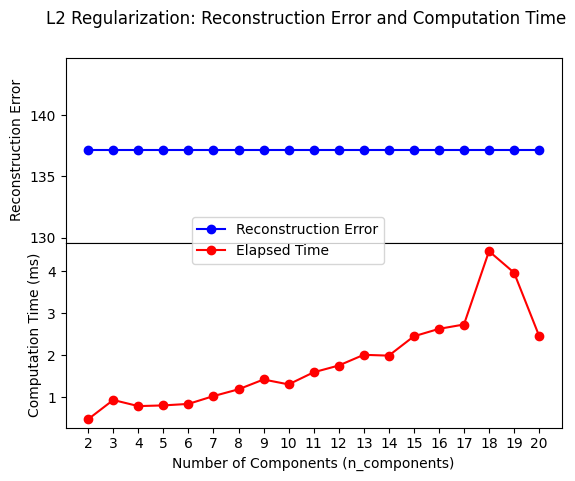

In [121]:
# Filter the DataFrame to include only rows where 'alpha' == 0
filtered_df = df[(df['alpha'] == 10) & (df['l1_ratio'] == 0)]
# Perform the grouping operations on the filtered DataFrame
grouped = filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_time = filtered_df.groupby('n_components')['time'].mean().reset_index()

# fig, axes = plt.subplots(2, 1, figsize=(10,8))
fig = plt.figure()
gs = fig.add_gridspec(nrows = 2, hspace=0)
axes = gs.subplots(sharex=True)
axes[0].set_xticks(np.arange(min(grouped['n_components']), max(grouped['n_components']) + 1 , 1))
# axes = axes.flatten()
# Plot the reconstruction error
# plt.figure(figsize=(6, 4))
fig.suptitle('L2 Regularization: Reconstruction Error and Computation Time') 
# axes[0].set_title('Reconstruction Error vs Number of Components')
line1, = axes[0].plot(grouped['n_components'], grouped['reconstruction_error'], marker='o', linestyle='-', color='b', label='Reconstruction Error')
axes[0].set(xlabel = 'Number of Components (n_components)', ylabel='Reconstruction Error')

# axes[1].set_title('Computation Time vs Number of Components')
line2, = axes[1].plot(grouped_time['n_components'], grouped_time['time'], marker='o', linestyle='-', color='r', label='Elapsed Time')
axes[1].set(xlabel = 'Number of Components (n_components)', ylabel='Computation Time (ms)')
# plt.legend()
fig.legend(handles=[line1, line2], loc = 'center')
plt.show()

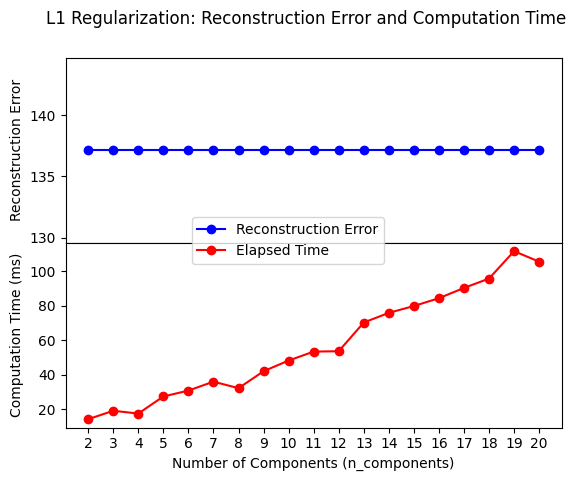

In [122]:
# Filter the DataFrame to include only rows where 'alpha' == 0
filtered_df = df[(df['alpha'] == 1) & (df['l1_ratio'] == 1)]

# Perform the grouping operations on the filtered DataFrame
grouped = filtered_df.groupby('n_components')['reconstruction_error'].mean().reset_index()
grouped_time = filtered_df.groupby('n_components')['time'].mean().reset_index()

# fig, axes = plt.subplots(2, 1, figsize=(10,8))
fig = plt.figure()
gs = fig.add_gridspec(nrows = 2, hspace=0)
axes = gs.subplots(sharex=True)
axes[0].set_xticks(np.arange(min(grouped['n_components']), max(grouped['n_components']) + 1 , 1))
# axes = axes.flatten()
# Plot the reconstruction error
# plt.figure(figsize=(6, 4))
fig.suptitle('L1 Regularization: Reconstruction Error and Computation Time') 
# axes[0].set_title('Reconstruction Error vs Number of Components')
line1, = axes[0].plot(grouped['n_components'], grouped['reconstruction_error'], marker='o', linestyle='-', color='b', label='Reconstruction Error')
axes[0].set(xlabel = 'Number of Components (n_components)', ylabel='Reconstruction Error')

# axes[1].set_title('Computation Time vs Number of Components')
line2, = axes[1].plot(grouped_time['n_components'], grouped_time['time'], marker='o', linestyle='-', color='r', label='Elapsed Time')
axes[1].set(xlabel = 'Number of Components (n_components)', ylabel='Computation Time (ms)')
# plt.legend()
fig.legend(handles=[line1, line2], loc = 'center')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

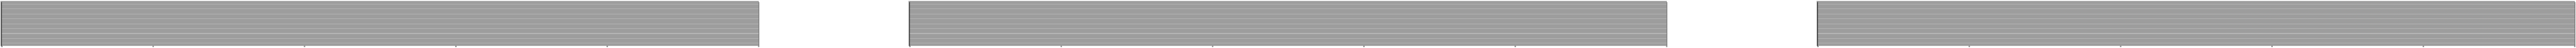

In [123]:
# Step 1: Convert the 'topics' column from string representation of a list to an actual list
# df['topics'] = df['topics'].apply(ast.literal_eval)
df['topics_string'] = df['topics'].apply(lambda x: ' '.join(x))
df_number_of_rows = df.shape[0]

# Create a grid of plots
num_cols = 3  # Number of columns in the grid
num_rows = int(df_number_of_rows / num_cols) + 1 # Number of rows in the grid

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_rows * 4, num_cols * 3))

# Flatten axes array for easy indexing
# axes = axes.flatten()

# Iterate over each row in the DataFrame and plot word clouds in subplots
for idx, row in df.iterrows():
    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(row['topics']))
    
    # Select the current subplot (axis) for this row
    ax = axes[idx]
    
    # Plot the word cloud in the corresponding subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')  # Hide axes
    
    # Add title with component information
    ax.set_title(f"n_components: {row['n_components']}, alpha: {row['alpha']}, l1_ratio: {row['l1_ratio']}")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Group the DataFrame by 'n_components'
grouped = df.groupby('n_components')


# Create a grid of plots
num_cols = 3  # Number of columns in the grid
num_rows = int(df_number_of_rows / num_cols) + 1 # Number of rows in the grid

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_rows * 4, num_cols * 3))

# Flatten axes array for easy indexing
# axes = axes.flatten()
# Iterate over each unique number of components and find the minimum reconstruction error
for n_components, group in grouped:
    min_error = group['reconstruction_error'].min()
    print(f"n_components: {n_components}, Minimum Reconstruction Error: {min_error}")

    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(row['topics']))
    
    # Select the current subplot (axis) for this row
    ax = axes[idx]
    
    # Plot the word cloud in the corresponding subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')  # Hide axes
    
    # Add title with component information
    ax.set_title(f"n_components: {row['n_components']}, alpha: {row['alpha']}, l1_ratio: {row['l1_ratio']}")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
